In [2]:
# In this project we are going to analysis the performance of student based on some parameters
# Steps to be followed
# 1. Understanding the problem statement
# 2. Data Collection
# 3. Data Checks to perform
# 4. Exploratory data analysis
# 5. Data Pre-Processing
# 6. Model Training
# 7. Choose best model

In [3]:
# 1. Problem statement
#    This project understand how the student's performance (Examination score) is affected by some factors 
#    such age gender,ethnicity,parent level of education,lunch category, course, math score,reading score,writing score


In [4]:
# 2. Data Collection
# The data which is used in this entire have been taken from kaggle Student performance datasets 
# Source:- https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [6]:
# importing useful libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv("student.csv")

In [10]:
df.shape

(1000, 8)

In [11]:
# 3. Data Checks to perform
# a. Check missing values
# b. Check Duplicates
# c. Check Data type
# d. Check the no of uniques values of each columns
# e. Check statistics of dataset
# f. Check various categories present in the different categorical columns

In [16]:
# a. Check missing values
df.isna().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing value

In [17]:
# b. Check Duplicates
df.duplicated().sum()

0

No Duplicate values

In [19]:
# c. Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
# d. unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [21]:
# e. check statistics of datasets
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
# f. Exploring Data
print(f"Unique data in gender :- {df['gender'].unique()}")
print(f"Unique data in race/ethnicity :- {df['race/ethnicity'].unique()}")
print(f"Unique data in parent study level :- {df['parental level of education'].unique()}")
print(f"Unique data in lunch category :- {df['lunch'].unique()}")
print(f"Unique data in preparation course :- {df['test preparation course'].unique()}")
print(f"Unique score in Math score :- {df['math score'].unique()}")
print(f"Unique score in Reading score :- {df['reading score'].unique()}")
print(f"Unique score in Writing score :- {df['writing score'].unique()}")

Unique data in gender :- ['female' 'male']
Unique data in race/ethnicity :- ['group B' 'group C' 'group A' 'group D' 'group E']
Unique data in parent study level :- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique data in lunch category :- ['standard' 'free/reduced']
Unique data in preparation course :- ['none' 'completed']
Unique score in Math score :- [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Unique score in Reading score :- [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  7

In [26]:
# Now defing numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

In [28]:
print(f" Numeric Features Columns are :- {numeric_features}")
print(f" Categorical Features Columns are :- {categorical_features}")

 Numeric Features Columns are :- ['math score', 'reading score', 'writing score']
 Categorical Features Columns are :- ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [30]:
# Adding for Columns for Total Score and Average of scores   Feature Engineering
df["Total score"]=df["math score"]+df["reading score"]+df["writing score"]
df["Average score"]=df["Total score"]/3

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
#Analysis
reading_full=df[df["reading score"]==100]['Average score'].count()
writing_full=df[df["writing score"]==100]['Average score'].count()
math_full=df[df["math score"]==100]['Average score'].count()

In [39]:
print(f"Number of student with 100 marks in Maths: {math_full}")
print(f"Number of student with 100 marks in Writing: {writing_full}")
print(f"Number of student with 100 marks in Reading: {reading_full}")


Number of student with 100 marks in Maths: 7
Number of student with 100 marks in Writing: 14
Number of student with 100 marks in Reading: 17


In [40]:
reading_20=df[df["reading score"]<=20]['Average score'].count()
writing_20=df[df["writing score"]<=20]['Average score'].count()
math_20=df[df["math score"]<=20]['Average score'].count()
print(f"Number of student with less than 20 marks in Maths: {math_20}")
print(f"Number of student with less than 20 marks in Writing: {writing_20}")
print(f"Number of student with less than 20 marks in Reading: {reading_20}")


Number of student with less than 20 marks in Maths: 4
Number of student with less than 20 marks in Writing: 3
Number of student with less than 20 marks in Reading: 1


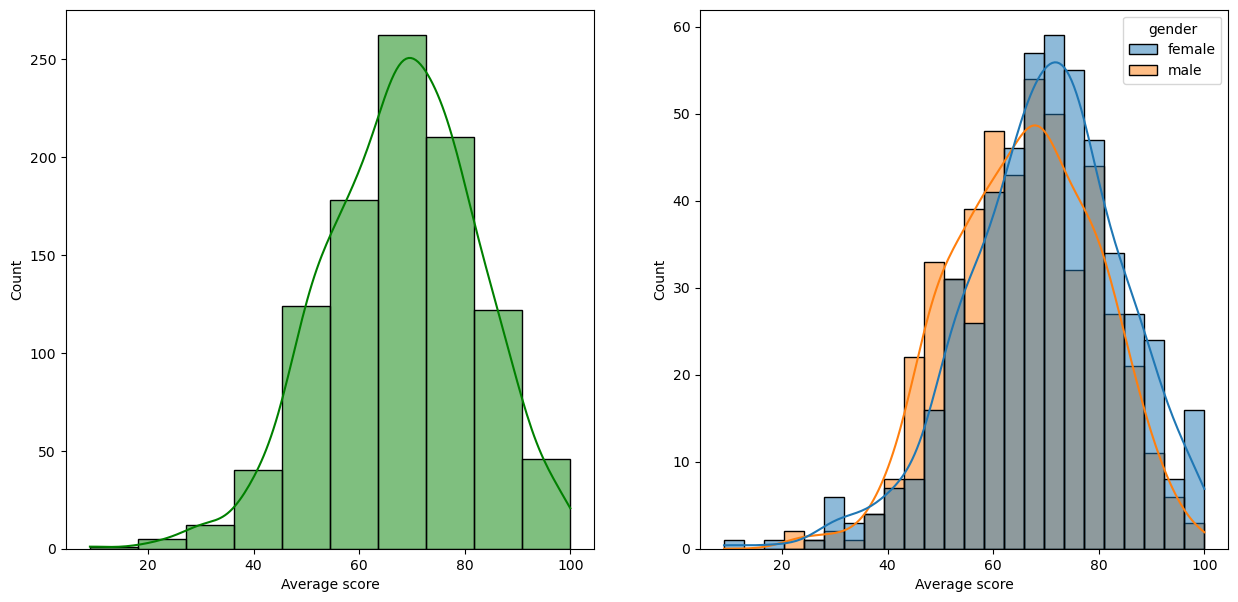

In [42]:
# 4. Exploratory data analysis
# 4.1 Histogram
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average score',bins=10,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average score',kde=True,hue='gender')
plt.show()
plt.tight_layout()

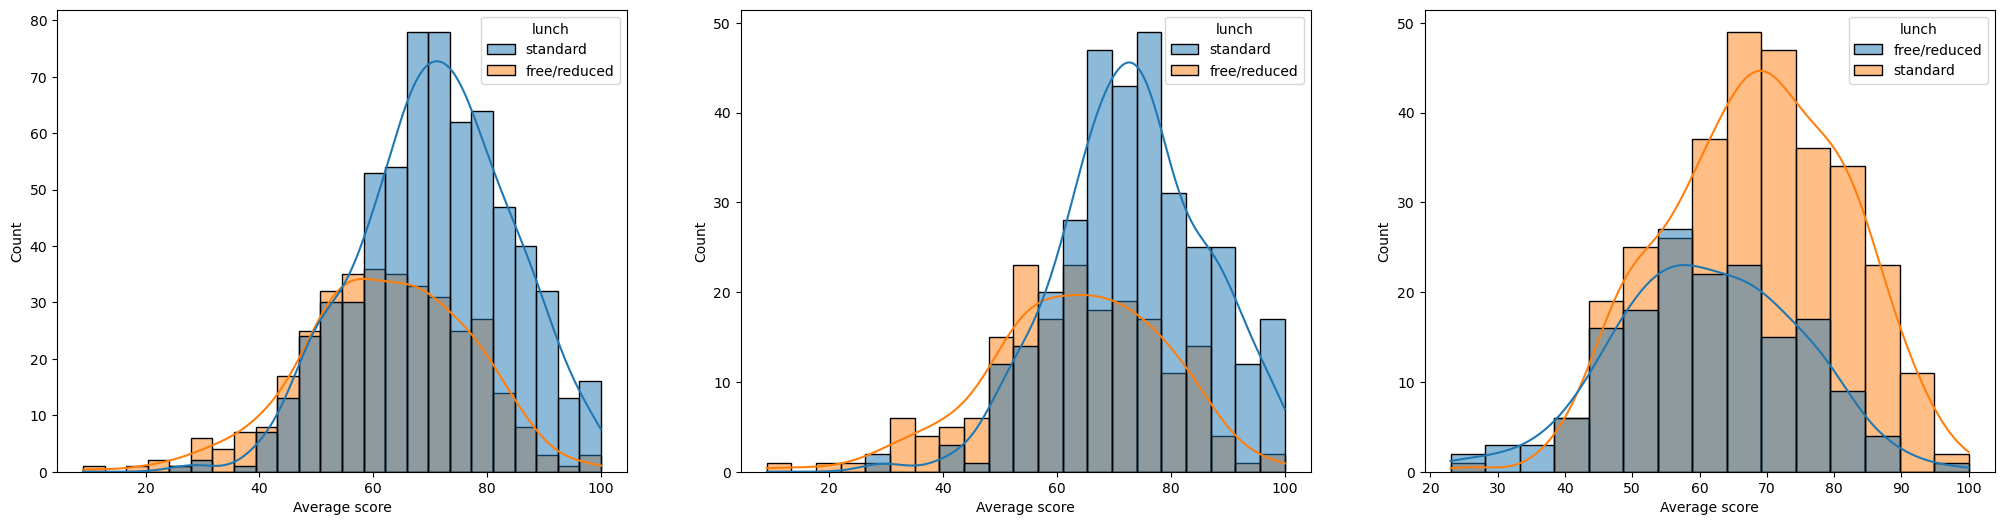

In [50]:
#Histogram among Average score all vs female vs male also indicating lunch timing
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='lunch')
plt.show()

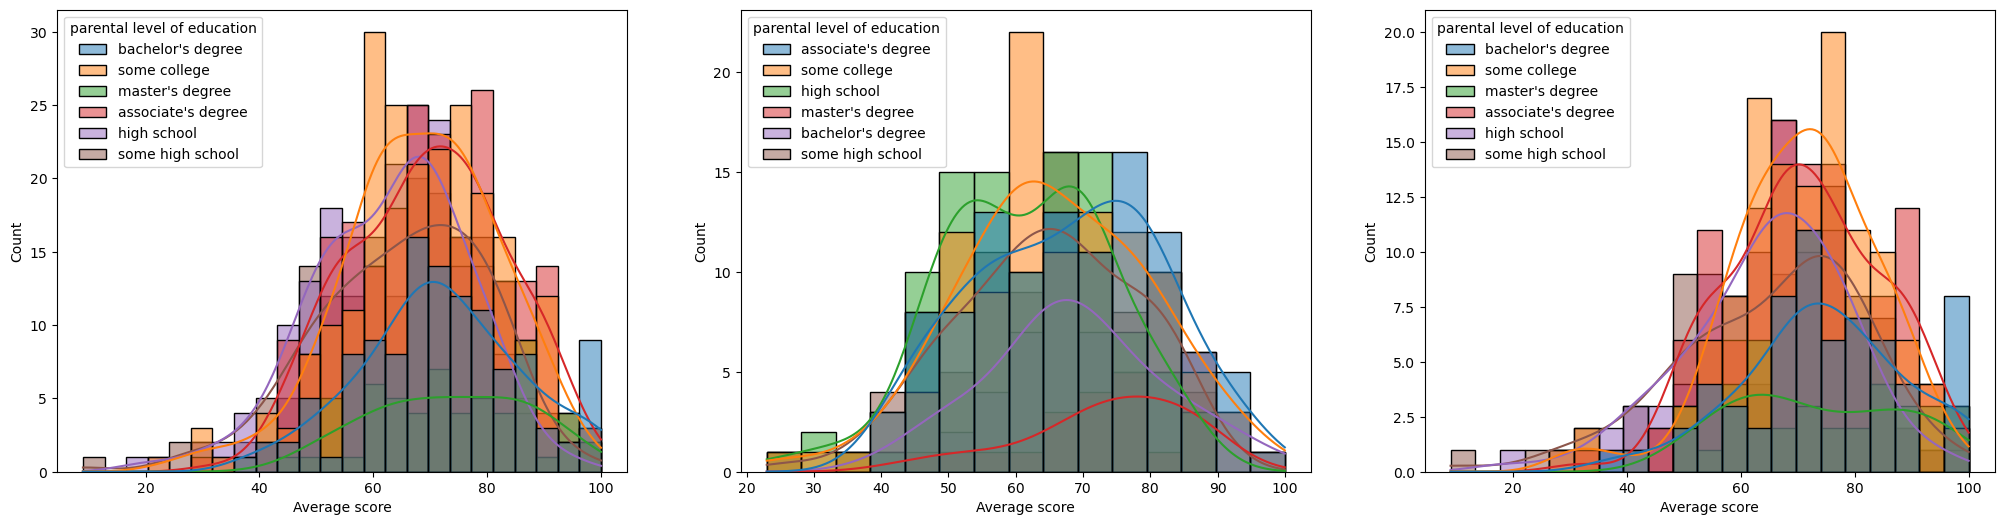

In [51]:
# on the basis of parental level of study
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='Average score',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='parental level of education')
plt.show()

Insights

In [52]:
# In general parent's education don't help student perform well in exam.
# 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
# 3rd plot we can see there is no effect of parent's education on female students.

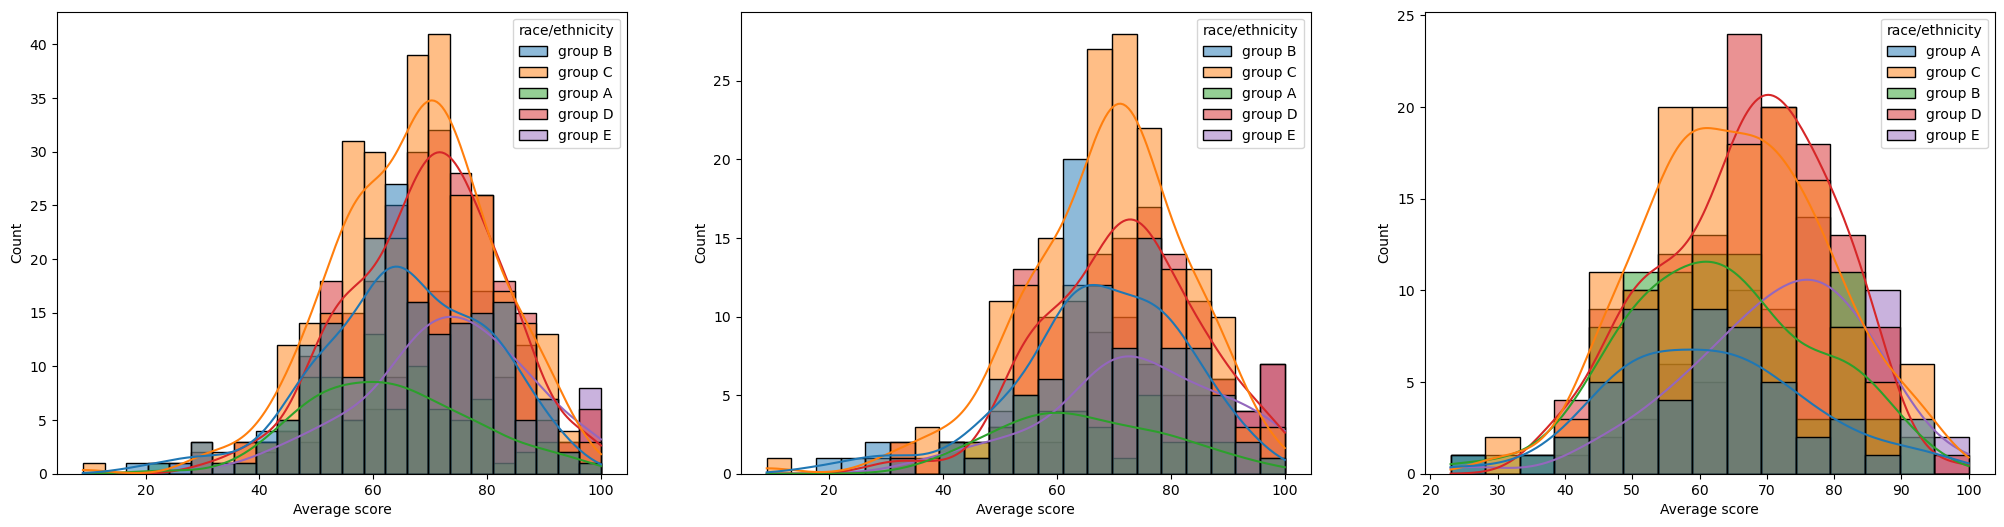

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='Average score',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='Average score',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='Average score',kde=True,hue='race/ethnicity')
plt.show()

Insights

In [55]:
# Students of group A and group B tends to perform poorly in exam.
# Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

Maximum score of students in all three Subjects

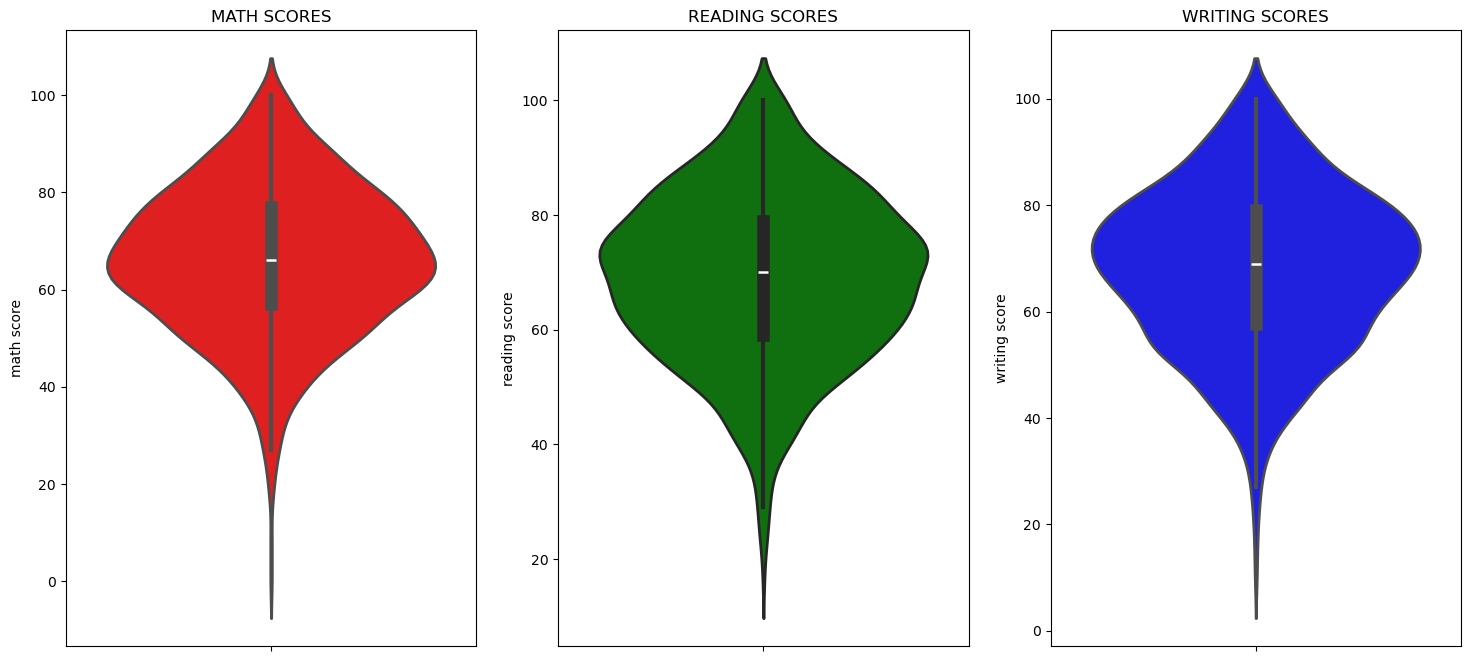

In [57]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=2)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=2)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=2)
plt.show()

Insights

In [59]:
# From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most 
# of them score from 50-80

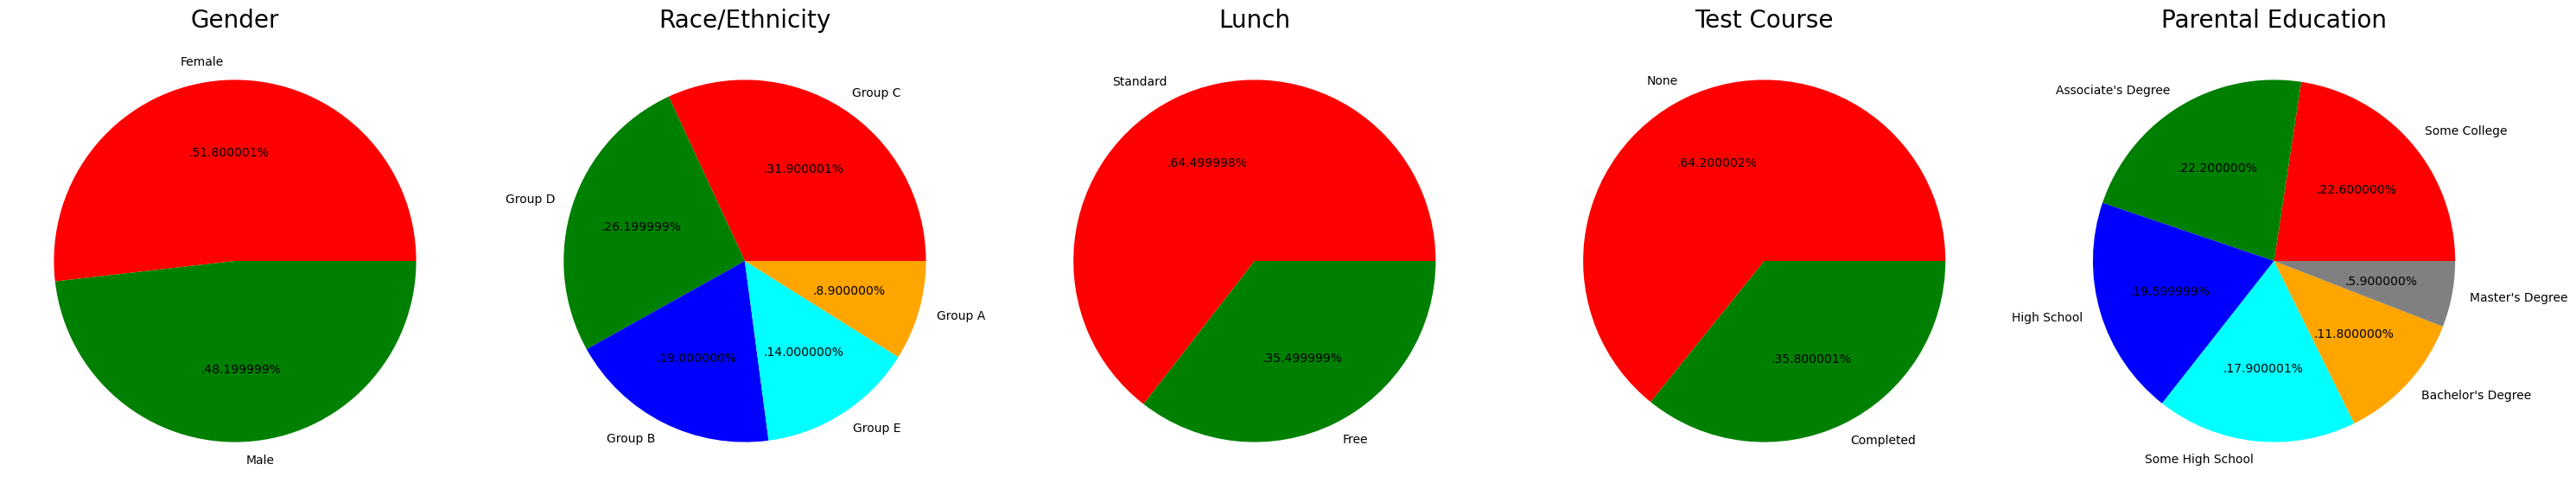

In [66]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

Insights

In [67]:
# Number of Male and Female students is almost equal
# Number students are greatest in Group C
# Number of students who have standard lunch are greater
# Number of students who have not enrolled in any test preparation course is greater
# Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

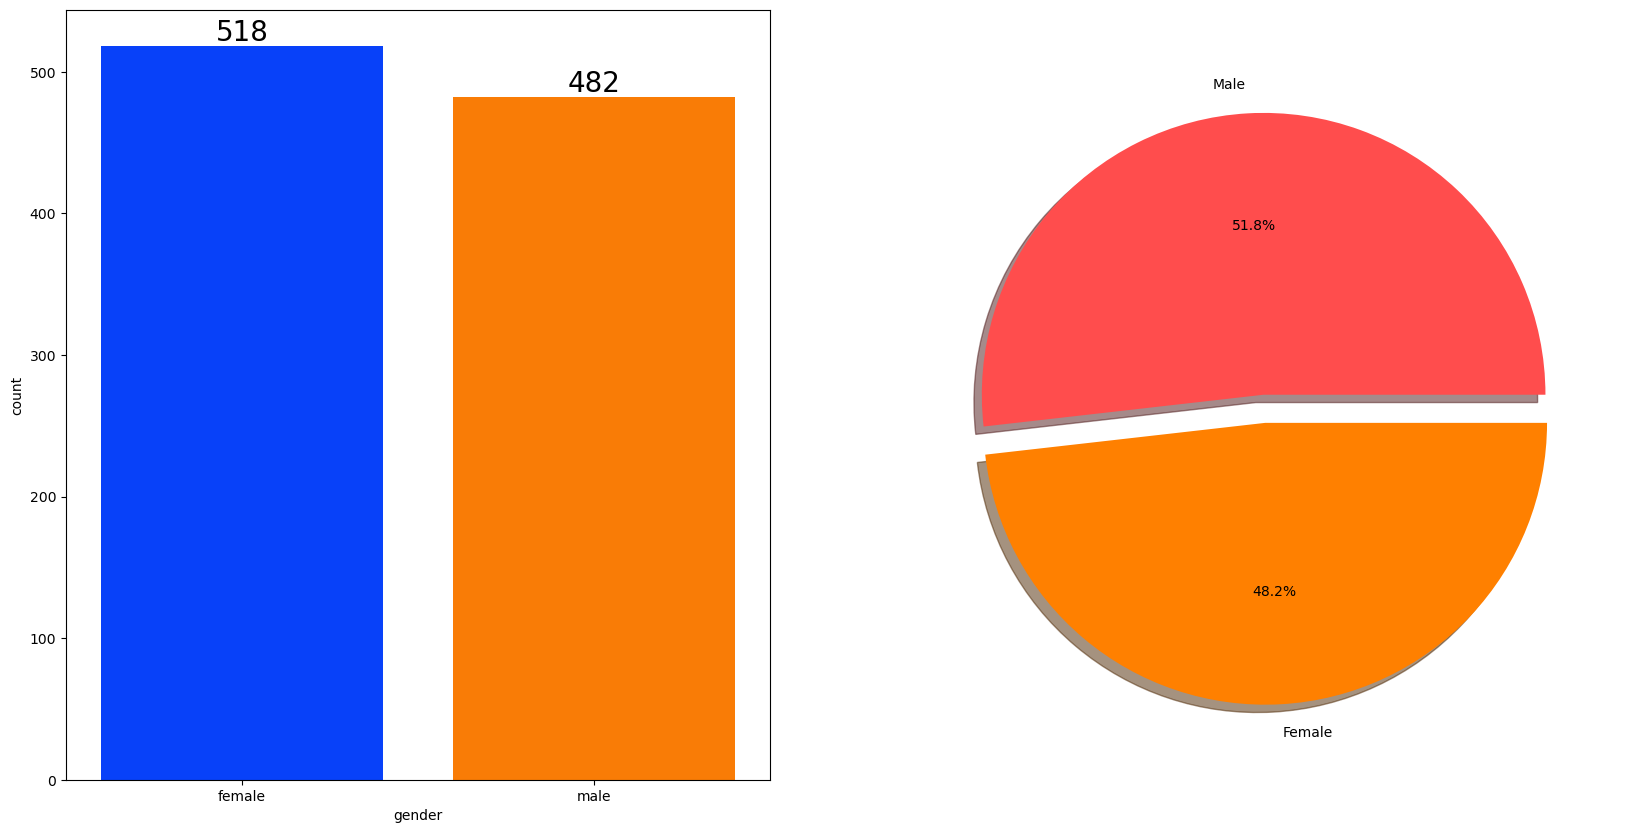

In [68]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

In [69]:
# Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [75]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [84]:
gender_group = df.groupby("gender")["Total score"].mean()
gender_math_group=df.groupby("gender")["math score"].mean()


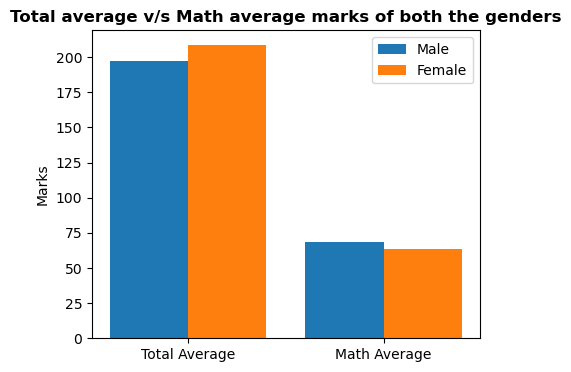

In [88]:
plt.figure(figsize=(5, 4))
X = ['Total Average','Math Average']
female_scores = [gender_group[0], gender_math_group[0]]
male_scores = [gender_group[1], gender_math_group[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights

In [89]:
# the average marks of girls are greater than boys.
# whereas males have scored higher in Maths.

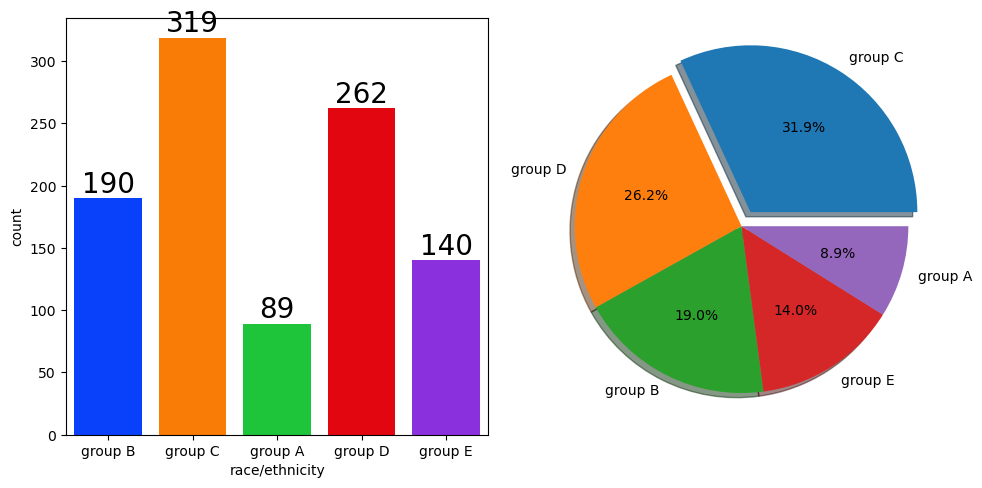

In [91]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.tight_layout()
plt.show() 

Insights

In [92]:
# Most of the student belonging from group C /group D.
# Lowest number of students belong to groupA.

In [2]:
# Group_data2=df.groupby('race/ethnicity')
# f,ax=plt.subplots(1,3,figsize=(20,8))
# sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
# ax[0].set_title('Math score',color='#005ce6',size=20)

# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=15)

# sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
# ax[1].set_title('Reading score',color='#005ce6',size=20)

# for container in ax[1].containers:
#     ax[1].bar_label(container,color='black',size=15)

# sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
# ax[2].set_title('Writing score',color='#005ce6',size=20)

# for container in ax[2].containers:
#     ax[2].bar_label(container,color='black',size=15)

In [3]:
# Group_data2=df.groupby('race/ethnicity')